# Definitions

In [1]:
# import
from astropy.io import ascii
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# read data and plot data functions
def readData(dataFile):
    infile = dataFile
    hdat1 = ascii.read(infile)
    return hdat1

def plotData(x, y1, y2, y3, y4, yerr1, yerr2, yerr3, yerr4):
    plt.errorbar(x, y1, yerr=yerr1, fmt='C0o')
    plt.errorbar(x, y2, yerr=yerr2, fmt='C1o')
    plt.errorbar(x, y3, yerr=yerr3, fmt='C2o')
    plt.errorbar(x, y4, yerr=yerr4, fmt='C3o')

In [3]:
# normalize other data function
def normalize(y1, y2, y3, y4, yerr1, yerr2, yerr3, yerr4):
    
    n1 = y1/np.mean(y1)
    
    n2 = y2/np.mean(y2)
    
    n3 = y3/np.mean(y3)
    
    n4 = y4/np.mean(y4)
    
    nerr1 = yerr1/np.mean(y1)
    
    nerr2 = yerr2/np.mean(y2)
    
    nerr3 = yerr3/np.mean(y3)
    
    nerr4 = yerr4/np.mean(y4)
    
    return n1,n2,n3,n4,nerr1,nerr2,nerr3,nerr4

In [4]:
def interpolateX(data, x):
    dx= ((data[x][-1])-(data[x][0]))/(data[x].size)
    
    newX = np.arange(data[x].size)
    newX = newX*dx
    newX = newX+data[x][0]
    return newX, dx

In [5]:
def interpolateY(dataX, newX, n1, n2, n3, n4, nerr1, nerr2, nerr3, nerr4, smoothSize):
    # creates newa array size newX with zeroes
    new1 = newX*0
    new2 = newX*0
    new3 = newX*0
    new4 = newX*0

    newerr1 = newX*0
    newerr2 = newX*0
    newerr3 = newX*0
    newerr4 = newX*0
    
    # Loop to create an interpolated set of y values
    for i in range(newX.size):
        # create mask of several surrounding values
        mask = (dataX>newX[i]-smoothSize) & (dataX<newX[i]+smoothSize)
        # calculate temporary value and error ranges
        tempn1 = n1[mask]
        temperr1 = nerra[mask]

        tempn2 = n2[mask]
        temperr2 = nerrb[mask]

        tempn3 = n3[mask]
        temperr3 = nerrc[mask]

        tempn4 = n4[mask]
        temperr4 = nerrd[mask]
        
        # clear nans
        tempn1 = tempn1[~np.isnan(tempn1)]
        tempn2 = tempn2[~np.isnan(tempn2)]
        tempn3 = tempn3[~np.isnan(tempn3)]
        tempn4 = tempn4[~np.isnan(tempn4)]
        temperr1 = temperr1[~np.isnan(temperr1)]
        temperr2 = temperr2[~np.isnan(temperr2)]
        temperr3 = temperr3[~np.isnan(temperr3)]
        temperr4 = temperr4[~np.isnan(temperr4)]

        
        # take means IF SET IS NOT EMPTY and save as a new data point
        if tempn1.size == 0:
            pass
        else:
            new1[i] = tempn1.mean()
            newerr1[i] = ((temperr1**2).mean())**0.5

            new2[i] = tempn2.mean()
            newerr2[i] = ((temperr2**2).mean())**0.5

            new3[i] = tempn3.mean()
            newerr3[i] = ((temperr3**2).mean())**0.5

            new4[i] = tempn4.mean()
            newerr4[i] = ((temperr4**2).mean())**0.5
            
    # clear zeros
    remainingIndices = np.nonzero(new1)
    new1 = new1[np.nonzero(new1)]
    new2 = new2[np.nonzero(new2)]
    new3 = new3[np.nonzero(new3)]
    new4 = new4[np.nonzero(new4)]
    newerr1 = newerr1[np.nonzero(newerr1)]
    newerr2 = newerr2[np.nonzero(newerr2)]
    newerr3 = newerr3[np.nonzero(newerr3)]
    newerr4 = newerr4[np.nonzero(newerr4)]
    remainingNewX = newX[remainingIndices]
    
    return new1, new2, new3, new4, newerr1, newerr2, newerr3, newerr4, remainingNewX

In [6]:
def shiftArray(n0, n1, n2, n3, err0, err1, err2, err3, chiRange):
    # loop the shift for some number of terms on each curve
    chi1 = np.zeros(chiRange)
    chi2 = np.zeros(chiRange)
    chi3 = np.zeros(chiRange)
    for i in range(chiRange):
        # "shift" set 1 left by i newdays and compare it to base set
        # create new temporary comparison arrays for the sets to be compared and normalize
        temp0 = n0[0:-(i+1)]
        temp0 = temp0/np.mean(temp0)
        temp1 = n1[(i+1):]
        temp1 = temp1/np.mean(temp1)
        temp2 = n2[(i+1):]
        temp2 = temp2/np.mean(temp2)
        temp3 = n3[(i+1):]
        temp3 = temp3/np.mean(temp3)
        # do the same for errors
        prechierr0 = err0[0:-(i+1)]
        prechierr0 = prechierr0/np.mean(prechierr0)
        prechierr1 = err1[(i+1):]
        prechierr1 = prechierr1/np.mean(prechierr1)
        prechierr2 = err2[(i+1):]
        prechierr2 = prechierr2/np.mean(prechierr2)
        prechierr3 = err3[(i+1):]
        prechierr3 = prechierr3/np.mean(prechierr3)
        # subtract these arrays and take the squares of the differences, plus error
        tempsquares1v0 = (temp1-temp0)**2/(prechierr1**2+prechierr0**2)
        tempsquares2v0 = (temp2-temp0)**2/(prechierr2**2+prechierr0**2)
        tempsquares3v0 = (temp3-temp0)**2/(prechierr3**2+prechierr0**2)
        # sum these squares
        tempchisquared1v0 = tempsquares1v0.sum()
        tempchisquared2v0 = tempsquares2v0.sum()
        tempchisquared3v0 = tempsquares3v0.sum()
        # add the sums to new arrays for each
        chi1[i] = tempchisquared1v0
        chi2[i] = tempchisquared2v0
        chi3[i] = tempchisquared3v0
        
    return chi1, chi2, chi3

In [7]:
def plotShiftedData(x, dx, n0, n1, n2, n3, chi1, chi2, chi3, err0, err1, err2, err3):
    # shift the graph some number of times and plot
    plt.errorbar(x, n0, yerr=newerrb, fmt='C1o')
    plt.errorbar(x-dx*np.argmin(chi1), n1, yerr=newerra, fmt='C0o')
    plt.errorbar(x-dx*np.argmin(chi2), n2, yerr=newerrc, fmt='C2o')
    plt.errorbar(x-dx*np.argmin(chi3), n3, yerr=newerrd, fmt='C3o')

# Main run sequence

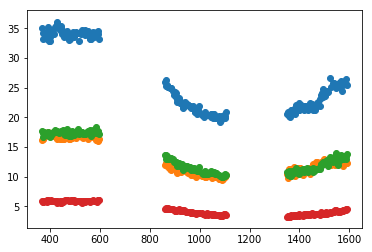

In [8]:
# main 1a (CONCATENATE 3)
data1 = readData("lens1_lightcurve.dat")
data2 = readData("lens2_lightcurve.dat")
data3 = readData("lens3_lightcurve.dat")
bigdata = np.concatenate((data1, data2, data3))

plotData(bigdata['day'], bigdata['ffa'], bigdata['ffb'], bigdata['ffc'], bigdata['ffd'], bigdata['fferra'], bigdata['fferrb'], bigdata['fferrc'], bigdata['fferrd'])

# plotData(data1['day'], data1['ffa'], data1['ffb'], data1['ffc'], data1['ffd'], data1['fferra'], data1['fferrb'], data1['fferrc'], data1['fferrd'])
# plotData(data2['day'], data2['ffa'], data2['ffb'], data2['ffc'], data2['ffd'], data2['fferra'], data2['fferrb'], data2['fferrc'], data2['fferrd'])
# plotData(data3['day'], data3['ffa'], data3['ffb'], data3['ffc'], data3['ffd'], data3['fferra'], data3['fferrb'], data3['fferrc'], data3['fferrd'])

In [9]:
"""
# main 1b (CONCATENATE)
data1 = readData("lens1lightcurve.dat")
data2 = readData("lens2_lightcurve.dat")
data = np.concatenate((data1, data2))
plotData(data['day'], data['ffa'], data['ffb'], data['ffc'], data['ffd'], data['fferra'], data['fferrb'], data['fferrc'], data['fferrd'])
"""

'\n# main 1b (CONCATENATE)\ndata1 = readData("lens1lightcurve.dat")\ndata2 = readData("lens2_lightcurve.dat")\ndata = np.concatenate((data1, data2))\nplotData(data[\'day\'], data[\'ffa\'], data[\'ffb\'], data[\'ffc\'], data[\'ffd\'], data[\'fferra\'], data[\'fferrb\'], data[\'fferrc\'], data[\'fferrd\'])\n'

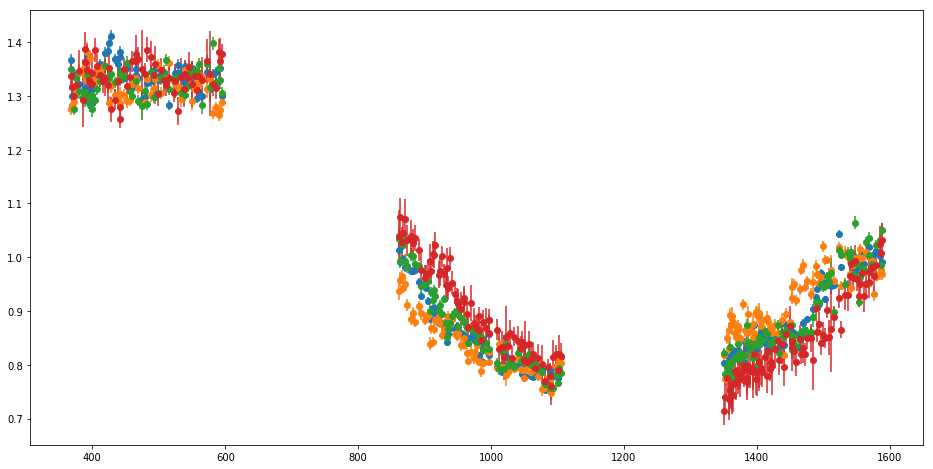

In [15]:
# main 2a (Normalize concatenated set and collect normalization average value)
naBig, nbBig, ncBig, ndBig, nerraBig, nerrbBig, nerrcBig, nerrdBig = normalize(bigdata['ffa'],bigdata['ffb'],bigdata['ffc'],bigdata['ffd'],bigdata['fferra'],bigdata['fferrb'],bigdata['fferrc'],bigdata['fferrd'])
plt.figure(figsize=(16,8))
plotData(bigdata['day'], naBig, nbBig, ncBig, ndBig, nerraBig, nerrbBig, nerrcBig, nerrdBig)

In [ ]:
# main 3a: test different interpolations (OPTIONAL)
newX, dx= interpolateX(data, 'day')
smoothRangeLow = input('enter a lower smoothing bound: ')
smoothRangeHigh = input('enter an upper smoothing bound: ')
smoothRange = np.arange(smoothRangeLow, smoothRangeHigh+1)
chiRange = input("Input a range of shifts: ")
plt.figure(figsize=(8, 7*smoothRange.size))
# """
ba = np.zeros(smoothRange.size)
bc = np.zeros(smoothRange.size)
bd = np.zeros(smoothRange.size)
# """
print('Calculating...')
for i in range(smoothRange.size):
    newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd, remainingNewX = interpolateY(data['day'], newX, na, nb, nc, nd, nerra, nerrb, nerrc, nerrd, smoothRange[i])
    chia, chib, chic = shiftArray(newb, newa, newc, newd, newerrb, newerra, newerrc, newerrd, chiRange)
    plt.subplot(smoothRange.size, 1, i+1)
    plotShiftedData(remainingNewX, dx, newb, newa, newc, newd, chia, chib, chic, newerrb, newerra, newerrc, newerrd)
    smoothSizeTitle = 'Flux vs. Day With a Smooth Size Of ' + str(smoothRange[i]) + ', ' + str(round((np.argmin(chia)*dx), 4)) + ' ' + str(round((np.argmin(chib)*dx), 4)) + ' ' + str(round((np.argmin(chic)*dx), 4)) + ' Days Shifted'
    plt.title(smoothSizeTitle)
    plt.xlabel('day')
    plt.ylabel('normalized flux')
    ba[i] = np.argmin(chia)*dx
    bc[i] = np.argmin(chib)*dx
    bd[i] = np.argmin(chic)*dx
# print(newa,newb,newc,newd)
    

In [ ]:
# main 3b: interpolate data
newX, dx= interpolateX(data, 'day')
smoothSize = input('enter a smoothing size: ')
newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd, remainingNewX = interpolateY(data['day'], newX, na, nb, nc, nd, nerra, nerrb, nerrc, nerrd, smoothSize)
# print(newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)
plotData(newX, newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)

In [ ]:
# main 4a
chiRange = input("Input a range of shifts: ")
chia, chib, chic = shiftArray(newb, newa, newc, newd, newerrb, newerra, newerrc, newerrd, chiRange)

In [ ]:
# main 4b (SEPARATE CASES)
chiRange = input("Input a range of shifts: ")
chia3, chib3, chic3 = shiftArray(newb, newa, newc, newd, newerrb, newerra, newerrc, newerrd, chiRange)

In [ ]:
# main 5: plot a single shifted result
newb, newa, newc, newd, dummy, dummy, dummy, dummy = normalize(newb, newa, newc, newd, newerrb, newerra, newerrc, newerrd)
plotShiftedData(remainingNewX, dx, newb, newa, newc, newd, chia, chib, chic, newerrb, newerra, newerrc, newerrd)

In [ ]:
# main 6: gather averages of shifts and calculate error of mean
baMean = ba.mean()
baMeanErr = ba.std()/(ba.size-1)**0.5
print('ba',baMean, baMeanErr)
bcMean = bc.mean()
bcMeanErr = bc.std()/(bc.size-1)**0.5
print('bc', bcMean, bcMeanErr)
bdMean = bd.mean()
bdMeanErr = bd.std()/(bd.size-1)**0.5
print('bd', bdMean, bdMeanErr)

# Testing Branch

In [ ]:
# 27.68
# 33.10
# 72.83

In [ ]:
print(dx)

In [ ]:
data

In [ ]:
data

In [ ]:
na = na[~np.isnan(na)]
newX = newX[~np.isnan(newX)]

In [ ]:
print(na)
print(na.size)
print(newX)
print(newX.size)

In [ ]:
# MASK TEST
print(newa)
newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd = interpolateY(data['day'], newX, na, nb, nc, nd, nerra, nerrb, nerrc, nerrd, smoothRange[i])

In [ ]:
print(na)

In [ ]:
newX, dx= interpolateX(data, 'day')

In [ ]:
print(newX)
print(dx)

In [ ]:
print(na)

In [ ]:
print(newerra.size)

In [ ]:
print(data['day'].size)

In [ ]:
print(newa.size)

In [ ]:
print(remainingIndices)

In [ ]:
print(newX.size)

In [ ]:
print(newa.size)

In [ ]:
print(chia)

In [ ]:
print(chia.argmin())
print(chic.argmin())

In [ ]:
print(remainingNewX.size)

In [ ]:
print(chia)

In [ ]:
print(chia1)
print(chib1)
print(chic1)

In [ ]:
print(chia2)
print(chib2)
print(chic2)

In [ ]:
print(chia3)
print(chib3)
print(chic3)

In [ ]:
chiaTotal = chia1 + chia2 + chia3
chibTotal = chib1 + chib2 + chib3
chicTotal = chic1 + chic2 + chic3

In [ ]:
print(chiaTotal)
print(chibTotal)
print(chicTotal)

In [ ]:
print(np.argmin(chiaTotal)*3.1605)
print(np.argmin(chibTotal)*3.1605)
print(np.argmin(chicTotal)*3.1605)

In [ ]:
print(np.argmin(chiaTotal)*3.1475)
print(np.argmin(chibTotal)*3.1475)
print(np.argmin(chicTotal)*3.1475)

In [ ]:
print(dx)

In [ ]:
print(np.argmin(chiaTotal))
print(np.argmin(chibTotal))
print(np.argmin(chicTotal))

In [ ]:
def plotData(x, y1, y2, y3, y4, yerr1, yerr2, yerr3, yerr4):
    plt.errorbar(x-31.604, y1, yerr=yerr1, fmt='C0o')
    plt.errorbar(x, y2, yerr=yerr2, fmt='C1o')
    plt.errorbar(x-37.926, y3, yerr=yerr3, fmt='C2o')
    plt.errorbar(x-85.333, y4, yerr=yerr4, fmt='C3o')

In [ ]:
data = readData("lens3_lightcurve.dat")
data1 = readData("lens1_lightcurve.dat")
data2 = readData("lens2_lightcurve.dat")
plt.figure(figsize=(16,8))
# na, nb, nc, nd, nerra, nerrb, nerrc, nerrd = normalize(data1['ffa'],data1['ffb'],data1['ffc'],data1['ffd'],data1['fferra'],data1['fferrb'],data1['fferrc'],data1['fferrd'])
plotData(data['day'], data['ffa'], data['ffb'], data['ffc'], data['ffd'], data['fferra'], data['fferrb'], data['fferrc'], data['fferrd'])
plotData(data1['day'], data1['ffa'], data1['ffb'], data1['ffc'], data1['ffd'], data1['fferra'], data1['fferrb'], data1['fferrc'], data1['fferrd'])
plotData(data2['day'], data2['ffa'], data2['ffb'], data2['ffc'], data2['ffd'], data2['fferra'], data2['fferrb'], data2['fferrc'], data2['fferrd'])

In [ ]:
newX, dx= interpolateX(data, 'day')
smoothSize = input('enter a smoothing size: ')
newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd, remainingNewX = interpolateY(data['day'], newX, na, nb, nc, nd, nerra, nerrb, nerrc, nerrd, smoothSize)
# print(newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)
plotData(newX, newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)

In [ ]:
plotData(newX, newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)